In [57]:
import pandas
import numpy

In [ ]:
df = pandas.read_csv("../../data/raw/car_fuel_efficiency.csv")

In [59]:
base = [
    "engine_displacement",
    "horsepower",
    "vehicle_weight",
    "model_year",
    "fuel_efficiency_mpg",
]
df = df[base]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

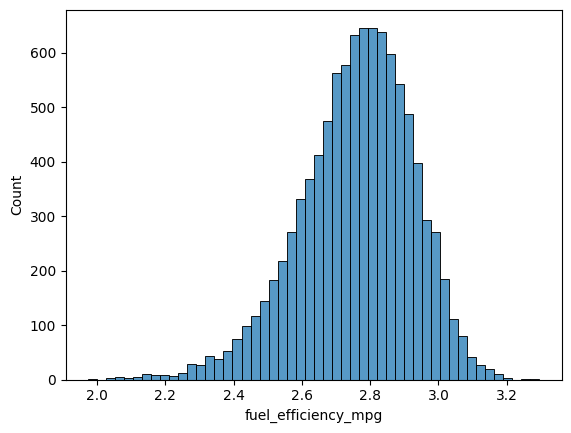

In [73]:
import seaborn as sns

sns.histplot(data=numpy.log1p(df.fuel_efficiency_mpg), bins=50)

Question 1


In [61]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Question 2


In [62]:
numpy.median(df.horsepower.fillna(0).to_numpy())

np.float64(146.0)

Question 3


In [ ]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test)

# shuffle the data
idx = numpy.arange(n)
numpy.random.seed(42)
numpy.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]

9704 5824 1940 1940


In [64]:
def prepare_X0(df):
    df = df.copy()
    df_num = df.fillna(0)
    X = df_num.to_numpy()
    return X


print(numpy.median(df_train.horsepower.fillna(0).values))


def prepare_X_mean(df):
    df = df.copy()
    df_num = df.fillna(146)
    X = df_num.to_numpy()
    return X

146.0


In [65]:
y_train = numpy.log1p(df_train.fuel_efficiency_mpg.values)
y_val = numpy.log1p(df_val.fuel_efficiency_mpg.values)
y_test = numpy.log1p(df_test.fuel_efficiency_mpg.values)

In [66]:
def train_linear_regression(X, y):

    ones = numpy.ones(X.shape[0])
    X = numpy.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = numpy.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    w0 = w_full[0]
    w = w_full[1:]
    return w0, w


def rmse(y, y_pred):
    error = y - y_pred
    se = pow((error), 2)
    mse = numpy.mean(se)
    rmse = numpy.sqrt(mse)
    return rmse

In [67]:
# col fill with zero
X_train = prepare_X0(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X0(df_val)
y_pred = w0 + X_val.dot(w)
print("col fill with zero:", round(rmse(y_val, y_pred), 2))

# col fill with mean
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
print("col fill with mean:", round(rmse(y_val, y_pred), 2))

col fill with zero: 0.02
col fill with mean: 0.02


Question 4


In [68]:
def train_linear_regression_reg(X, y, r):

    ones = numpy.ones(X.shape[0])
    X = numpy.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * numpy.eye(XTX.shape[0])
    XTX_inv = numpy.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    w0 = w_full[0]
    w = w_full[1:]
    return w0, w


for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    X_train = prepare_X0(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    # Validation
    X_val = prepare_X0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)

    print("reg parameter: ", r, "bias term: ", w0, "rmse: ", score)

reg parameter:  0 bias term:  1.793818790643904 rmse:  0.02
reg parameter:  0.01 bias term:  1.5440754978288922 rmse:  0.02
reg parameter:  0.1 bias term:  0.6853622471991292 rmse:  0.02
reg parameter:  1 bias term:  0.10451465405937821 rmse:  0.02
reg parameter:  5 bias term:  0.021984035809779714 rmse:  0.02
reg parameter:  10 bias term:  0.011097019199706668 rmse:  0.02
reg parameter:  100 bias term:  0.0011799994601138716 rmse:  0.02


Question 5


In [69]:
def seed(s):
    idx = numpy.arange(n)
    numpy.random.seed(s)
    numpy.random.shuffle(idx)
    return idx


scores = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = seed(s)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train : n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val :]]

    X_train = prepare_X0(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    # Validation
    X_val = prepare_X0(df_val)
    y_pred = w0 + X_val.dot(w)
    scores.append(rmse(y_val, y_pred))

print(scores)
std = numpy.std(scores)
print(std)
round(std, 3)

[np.float64(0.17203164227112572), np.float64(0.17188457783933334), np.float64(0.17192137052343773), np.float64(0.17200494822086912), np.float64(0.17200510866947763), np.float64(0.1719731917770468), np.float64(0.1719226538768807), np.float64(0.1719239209805761), np.float64(0.1718757324407074), np.float64(0.17195019015314317)]
5.029760407676334e-05


np.float64(0.0)

Question 6


In [70]:
idx = seed(9)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]

train_full = pandas.concat([df_train, df_val])
y_full_train = numpy.concatenate([y_train, y_val])

X_train = prepare_X0(train_full)
w0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)

# Validation
X_test = prepare_X0(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.15795028587924337)